# Trabalho Prático 4
## ISEL - LEIM

## Docente - Gonçalo Marques

### Trabalho realizado por:
Mª Luísa Melo e Sampaio Nº50799
André Nº
Carlos Ceita Nº50950

#### Exercicio 1

Neste primeiro exercicio, pretende-se implementar e analisar o desempenho dum codificador/descodificador JGEG sequencial para compressão de imagens a tons de cinzento.
<br>
<br>
Em JPEG Sequencial, cada componente da imagem (luminância e crominância) é analisada e codificada numa única passsagem, da esquerda para a direita e de cima para baixo. É o modo de operação mais comum.
<br>
<br>
A função cv2.dct() aplica a <strong>Transformada Discreta de Cosseno</strong> a uma imagem ou bloco de imagem. Converte a imagem para frequências.
<br>
<br>
Já a função cv2.idct() aplica a <strong>Transformada Inversa Discreta de Cosseno</strong>. Reconstrói a imagem a partir de frequências.

In [7]:
# imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cv2
from time import time
from os import path
import re

In [8]:
def dividir8(img, block_size=8):
    """ 
    Função que divide a imagem em 8
    """
    h, w = img.shape
    blocos = []
    
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            bloco = img[i:i+block_size, j:j+block_size]
            if bloco.shape == (block_size, block_size):
                blocos.append(bloco)
    return blocos

def dct(blocos):
    """
    função que aplica dct
    """
    blocos_dct = []
    for bloco in blocos:
        bloco_dct = cv2.dct(bloco)
        blocos_dct.append(bloco_dct)
    return blocos_dct

def idct(blocos_dct):
    """
    função que aplica idct
    """
    blocos_recuperados = []
    for bloco_dct in blocos_dct:
        bloco_rec = cv2.idct(bloco_dct)
        blocos_recuperados.append(bloco_rec)
    return blocos_recuperados

def reconstruir_imagem(blocos, img_shape, block_size=8):
    """
    função que reconstroi a imagem
    """
    h, w = img_shape
    img_rec = np.zeros((h, w), np.float32)
    index = 0
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            img_rec[i:i+block_size, j:j+block_size] = blocos[index]
            index += 1
    return img_rec

def dctidct(caminho_imagem):
    # ler imagem colorida
    img = cv2.imread(caminho_imagem)
    
    if img is None:
        raise ValueError(f"Imagem null")
    
    # converter para cinzento
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.float64(img_gray)

    # dividir em blocos de 8x8
    blocos = dividir8(img)
    
    # dct
    blocos_dct = dct(blocos)
    
    #idct
    blocos_recuperados = idct(blocos_dct)
    
    # reconstruir img
    img_rec = reconstruir_imagem(blocos_recuperados, img.shape)
    
    return img, blocos_dct, img_rec
    

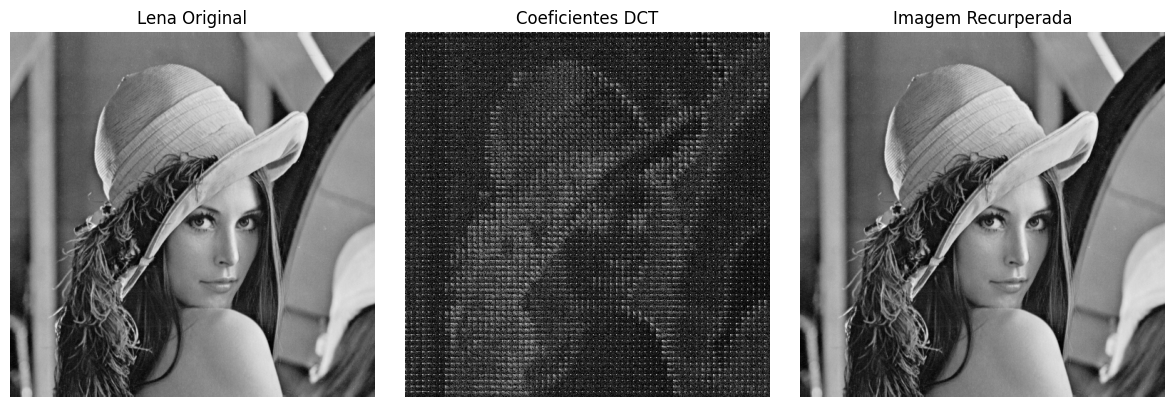

In [9]:
caminho_lena = "/Users/luisameloesampaio/Desktop/school/ISEL/6Sem/CSM/Trabalhos/TP4/lena.tif"


img, blocos_dct, img_rec = dctidct(caminho_lena)

# construir a img dct
h, w = img.shape
block_size = 8
imagem_dct = np.zeros((h, w), np.float32)
index = 0
for i in range(0, h, block_size):
    for j in range(0, w, block_size):
        imagem_dct[i:i+block_size, j:j+block_size] = blocos_dct[index]
        index += 1
        
# visualizar imagens
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.title("Lena Original")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Coeficientes DCT")
plt.imshow(np.log(np.abs(imagem_dct) + 1), cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Imagem Recurperada")
plt.imshow(img_rec, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()